#**Data Science Engineering Methods and Tools**

## **Assignment 3** – Data Cleaning and Feature Selection

**Name** - Rituja Lolam

**Nuid** - 002146428

# **Abstract**
Insurance claims are the need of the hour with a widespread of different viruses  which have a global impact. It is now an important factor to track the insurance charges
In the recent times, there has been a gradual growth in the insurance charges required for a particular individual. These charges are dependent on series of factors such as sex, bmi, children, smoker, age which affects the insurance charges.

In the below notebook, I have explored the concepts of data distribution, collinearity, feature selection, data imputation and used random forest regressor model for model training

**Columns:**

* age: age of primary beneficiary

* sex: insurance contractor gender: female(0), male(1)

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

* children: Number of children covered by health insurance 

* smoker: Smoker(1),Non-smoker(0)

* region: the beneficiary's residential area in the US: southwest(0)
southeast(1),northwest(2),northeast(3)

* charges: Individual medical costs billed by health insurance

## Importing necessary libraries




In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

**Data Loading**
*    Reading the data




In [425]:
#Data is stored in the github account
data = pd.read_csv("https://github.com/Ritujauni/Data-Science/raw/main/DS_insurance.csv")

In [426]:
#Seeing the data in the file
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*    Descriptive Statistics



In [427]:
#Displaying the number of rows and number of columns in the DataFrame
data.shape

(1338, 7)

In [428]:
#information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Question : What are the data types? (Only numeric and categorical)

* There Are Three Categorical Columns - sex, smoker, region
* There Are Four Numerical Columns - age, bmi, children, charges

In [429]:
#Generates descriptive statistics of DataFrame columns.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 Question: Are there missing values?

*   There are no missing values in the data





In [430]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Question : What are the distributions of the predictor variables?  

**Analysis Techniques**

* Univariate Analysis - Histogram



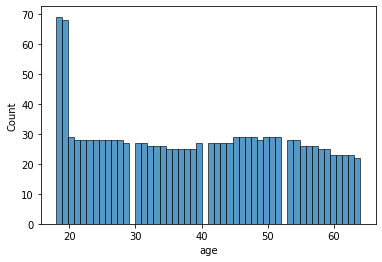

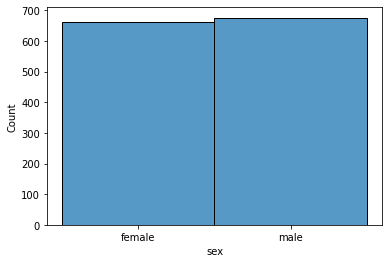

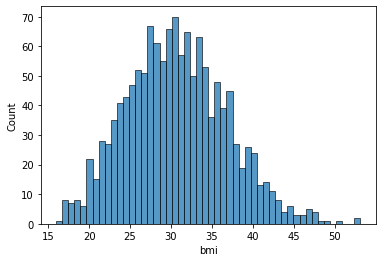

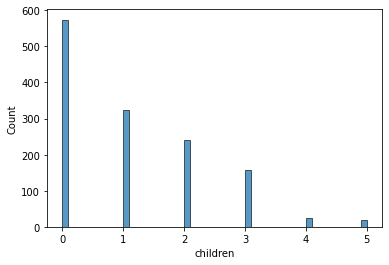

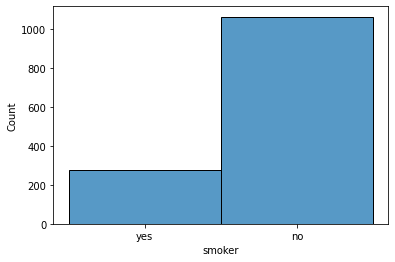

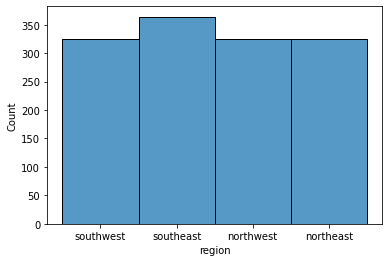

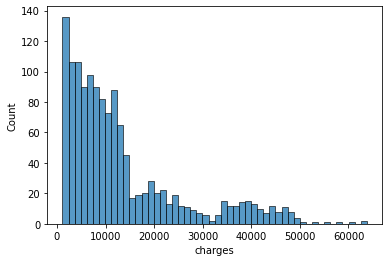

In [431]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.histplot(data[col],bins=50)

Question : What are the distributions of the predictor variables?

* For age and smoker the distribution is right skewed.

* For sex, the distribution is bimodal.

* Children and region are multimodels.

* Bmi is normally distributed.

* Charges is right skewed.

**Bivariate Analysis- Pair Plot**



<Figure size 720x720 with 0 Axes>

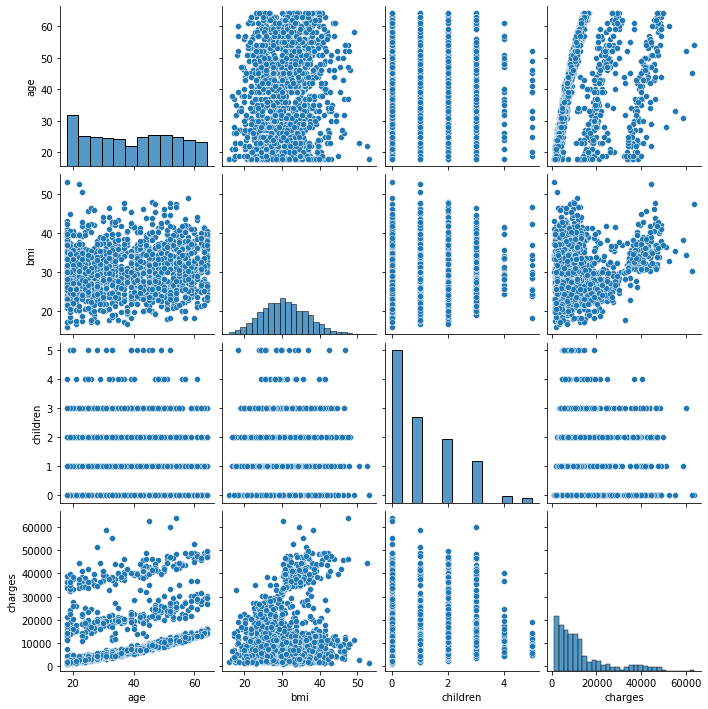

In [432]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

<Figure size 576x360 with 0 Axes>

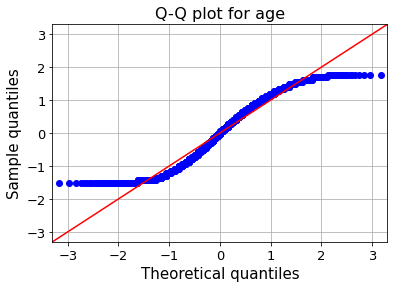

<Figure size 576x360 with 0 Axes>

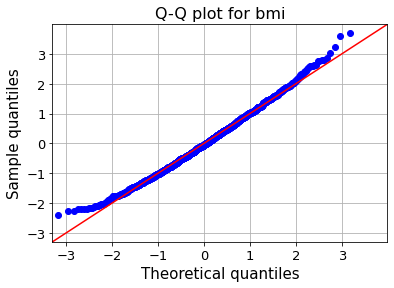

<Figure size 576x360 with 0 Axes>

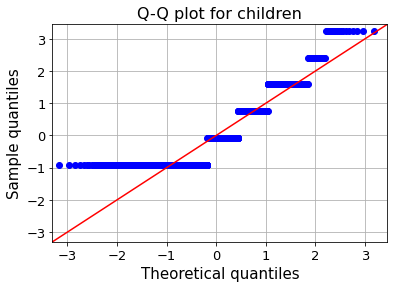

<Figure size 576x360 with 0 Axes>

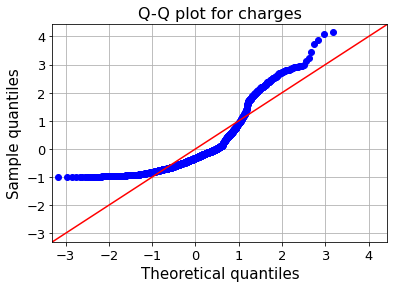

In [433]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats


data_norm= data[['age','bmi','children','charges']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],dist='norm',fit='True',line='45')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot for {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Question : What are the likely distributions of the numeric variables?**

Age, BMI, Charges are roughly normally distributed.

**Question :**Which independent variables have missing data? How much? 

* Result : There are no null values in the data set.

In [434]:
#Displaying the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Visualizing Relationship Between Features and Dependent Variable (charges)**

**Age vs Charges**

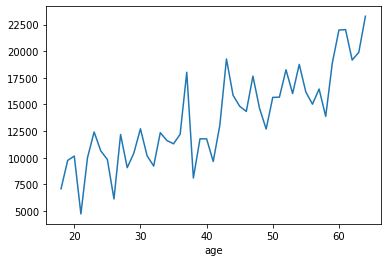

In [435]:
data.groupby('age')['charges'].mean().plot()


By Looking At The Above Graph We Can State That Insurance Charges Increases With Age, Which Is Generally True Because People With Higher Age Has A Higher Chance of Death

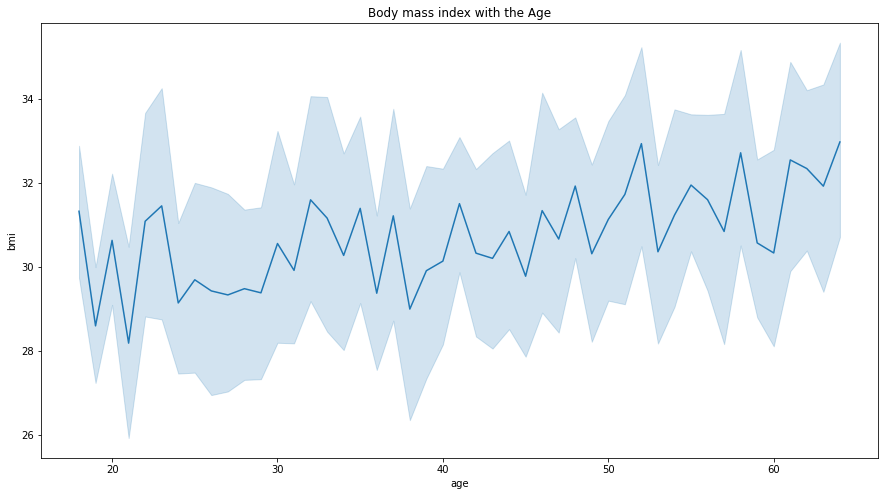

In [436]:
## Age vs BMI
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="age",y="bmi",palette='dark')
plt.title("Body mass index with the Age")
plt.show()

 **Sex vs Charges**

Text(0.5, 1.0, 'Relationship between charges and sex')

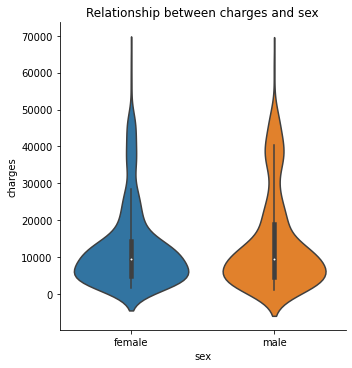

In [437]:
#Relation between sex and charges
sns.catplot('sex','charges',data=data,kind='violin')
plt.title('Relationship between charges and sex')

**Smoker vs Charges**

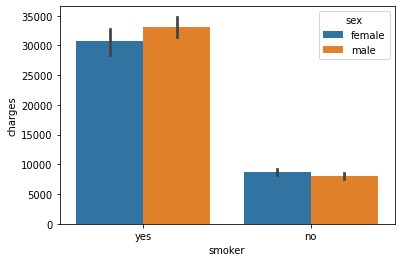

In [438]:
sns.barplot(data=data,x='smoker',y='charges',hue='sex')

**BMI vs Charges**

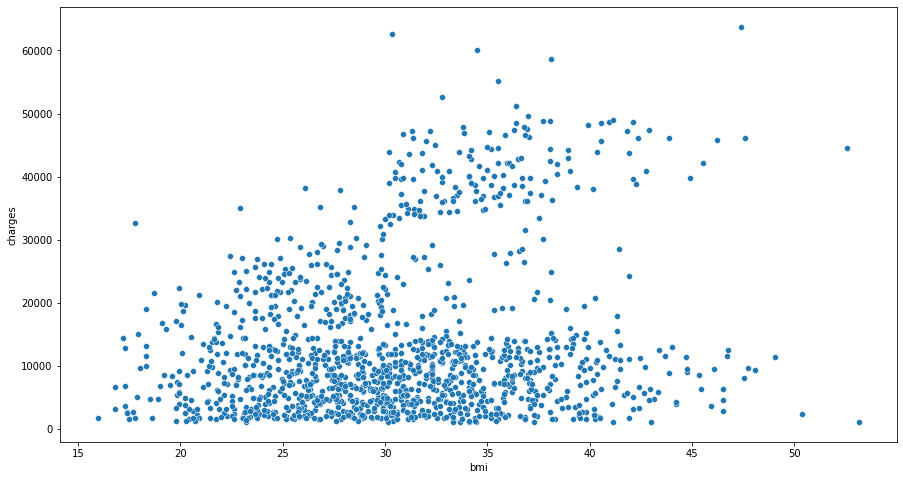

In [439]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='bmi',y='charges')

**Childrens Vs Charges**

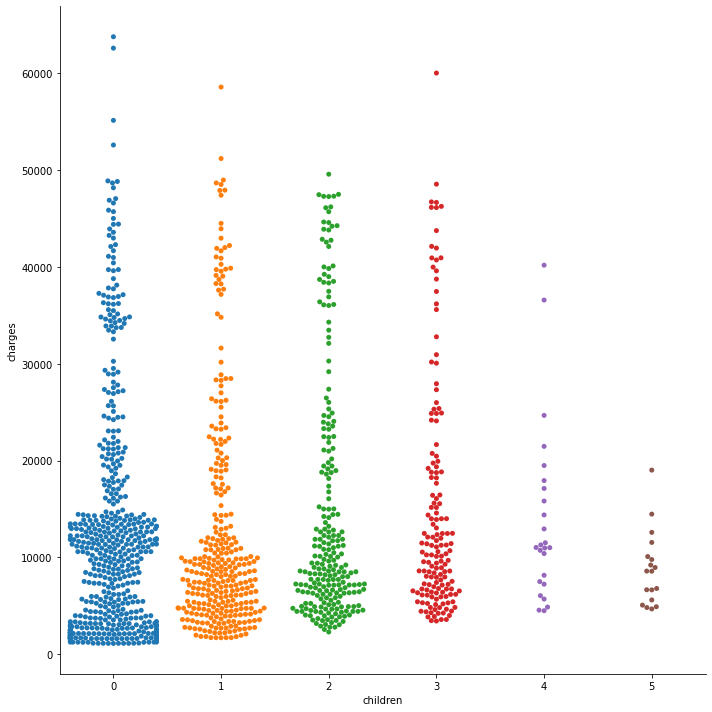

In [440]:
sns.catplot(x="children", y="charges",kind="swarm", data=data,height=10)

**Regions vs Charges**

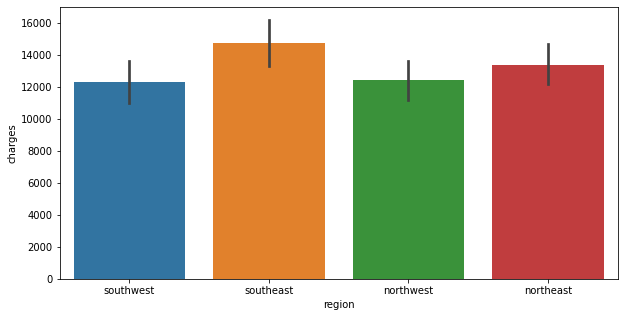

In [441]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='region',y='charges')

Region vs Smoker
→ Insurance Charge Based on Region and Their Habit of Smoking

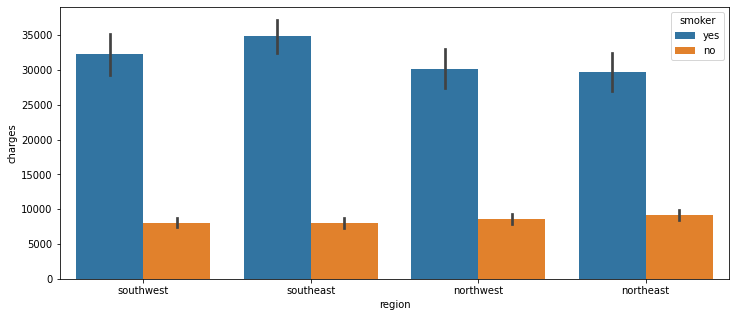

In [442]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=data,x='region',y='charges',hue='smoker')

Results From The Analysis 
* BMI (Body Mass Index) Follows A Close To Gaussian Distribution
* There Are Three Categorical Columns -['sex', 'smoker', 'region']
* There Are Four Numerical Columns - ['age','bmi','children','charges']

Question: In the predictor variables independent of all the other predictor variables?
* As the Age of The Person Increase Insurance Charges Also increases.
* A Smoker Has Higher Insurance Charges Than A Non-Smoker.
* Males Smokes More Than Females.
* Insurance Charge For Male and Female is mostly similar.
* Southeast region has more amount of smokers and old people than other regions.

**Converting Categorical Values to Numerical Values**



 Assigning the values for encoding

* Sex

    Male = 0

    Female = 1

* Smoker

    Yes = 1

    No = 0

In [443]:
#Assigning the values for encoding
data['sex'] = data.sex.map({'male':0, 'female':1})
data['smoker'] = data.smoker.map({'no':0, 'yes':1})
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


**Correlation between all the features in the data Using Heat Maps**

The correlation coefficient has values between -1 to 1:
 * A value closer to 0 indicates weaker correlation
 * A value closer to 1 indicates stronger positive correlation
 * A value closer to -1 indicates stronger negative correlation

Note : Exact 0 implying no correlation

In [444]:
#Finding Correlation
corr= data.corr()
corr

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


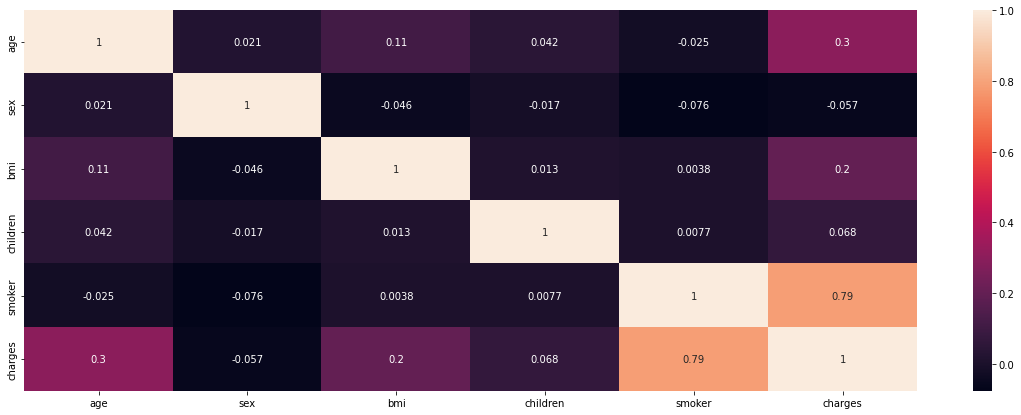

In [445]:
#plotting the heat map of the correlation
plt.figure(figsize = (20,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [446]:
 # Find how much each attribue correlates to Charges
 corr["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex        -0.057292
Name: charges, dtype: float64

Question: Which predictor variables are the most important?

*   Smoker, Age and BMI play a significant role in stroke prediction


In [447]:
results = smf.ols('charges ~ age +  sex + bmi + children + smoker + region', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:53:32   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                   256.8564     11.899     21.587      0.000     233.514     280.199
sex                   131.3144    332.945      0.394      0.693    -521.842     784.470
bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
children              475.5005    137.804      3.451      0.001     205.163     745.838
smoker               2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which independent variables are useful to predict a target (dependent variable)? 
*  OLS method 
*  Heat Map
* VIF 

**Variance inflation factor (VIF) to test multicollinearity**

In [448]:
#VIF

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('charges ~ age +  sex + bmi + children + smoker + region', data=data, return_type='dataframe')

vifcalc = pd.DataFrame()
vifcalc['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifcalc['variable'] = X.columns

In [449]:
vifcalc

,VIF,variable
0,36.383532,Intercept
1,1.518823,region[T.northwest]
2,1.652230,region[T.southeast]
3,1.529411,region[T.southwest]
4,1.016822,age
5,1.008900,sex
6,1.106630,bmi
7,1.004011,children
8,1.012074,smoker



*   There is no multicollinearity between the predictors as the VIF is low



In [450]:
data2=data.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data2['region'] = encoder.fit_transform(data2['region'])
region = {index : label for index, label in enumerate(encoder.classes_)}
region

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

In [451]:
#finding Range

d_range= data2.max()-data2.min()
d_range

age            46.00000
sex             1.00000
bmi            37.17000
children        5.00000
smoker          1.00000
region          3.00000
charges     62648.55411
dtype: float64

Question: Do the ranges of the predictor variables make sense?
* The value for age, bmi and charges makes sense since all are valid values
* All the other columns have sort of categorical data so they have fixed values

Question:  Do the training and test sets have the same data?
* Yes, the data is similar

**Splitting Train and Test Data**

In [452]:
## Data splitting
X = data.drop('charges',axis=1).values
y = data['charges'].values

In [453]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [454]:
X_train.shape

(1070, 6)

In [455]:
data.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]>

In [456]:
data_feature=pd.get_dummies(data, prefix=None, dummy_na=False, columns=['sex','children','smoker'], sparse=False, drop_first=True, dtype=None)
data_feature.head()

,age,bmi,region,charges,sex_1,children_1,children_2,children_3,children_4,children_5,smoker_1
0,19,27.900,southwest,16884.92400,1,0,0,0,0,0,1
1,18,33.770,southeast,1725.55230,0,1,0,0,0,0,0
2,28,33.000,southeast,4449.46200,0,0,0,1,0,0,0
3,33,22.705,northwest,21984.47061,0,0,0,0,0,0,0
4,32,28.880,northwest,3866.85520,0,0,0,0,0,0,0


In [457]:
data_feature.isna().sum()

age           0
bmi           0
region        0
charges       0
sex_1         0
children_1    0
children_2    0
children_3    0
children_4    0
children_5    0
smoker_1      0
dtype: int64

In [458]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

##Random Forest Regressor

In [459]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
importances1 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})

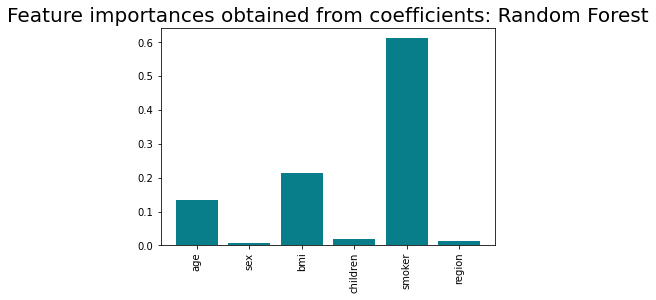

In [460]:
plt.bar(x=importances1['Attribute'], height=importances1['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients: Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

#XGBoost

In [461]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[03:53:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


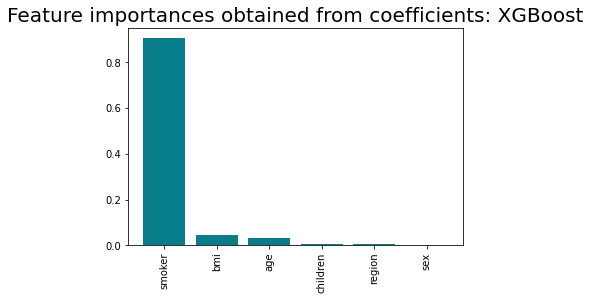

In [462]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients: XGBoost', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Question: Which predictor variables are the most important?**


*   By using Random Forest the most important features are age, sex, bmi.
*   Smoker is the most important feature while using XGBoost
* Overall age, sex, bmi are the most important predictor variables




##KNN Imputation

In [463]:
#KNN Imputation with 1%, 5% and 10% missing data
def get_percent_missing(data):
    
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_data = pd.DataFrame({'column_name': data.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

In [464]:
data['bmi_1_percent'] = data[['bmi']]
data['bmi_5_percent'] = data[['bmi']]
data['bmi_10_percent'] = data[['bmi']]

In [465]:
print(get_percent_missing(data))

                   column_name  percent_missing
age                        age              0.0
sex                        sex              0.0
bmi                        bmi              0.0
children              children              0.0
smoker                  smoker              0.0
region                  region              0.0
charges                charges              0.0
bmi_1_percent    bmi_1_percent              0.0
bmi_5_percent    bmi_5_percent              0.0
bmi_10_percent  bmi_10_percent              0.0


In [466]:
def create_missing(dataframe, percent, col):
    dataframe.loc[data.sample(frac = percent).index, col] = np.nan

In [467]:
create_missing(data, 0.01, 'bmi_1_percent')
create_missing(data, 0.05, 'bmi_5_percent')
create_missing(data, 0.1, 'bmi_10_percent')

In [468]:
print(get_percent_missing(data))

                   column_name  percent_missing
age                        age         0.000000
sex                        sex         0.000000
bmi                        bmi         0.000000
children              children         0.000000
smoker                  smoker         0.000000
region                  region         0.000000
charges                charges         0.000000
bmi_1_percent    bmi_1_percent         0.971599
bmi_5_percent    bmi_5_percent         5.007474
bmi_10_percent  bmi_10_percent        10.014948


In [469]:
number_1_idx = list(np.where(data['bmi_1_percent'].isna())[0])
number_5_idx = list(np.where(data['bmi_5_percent'].isna())[0])
number_10_idx = list(np.where(data['bmi_10_percent'].isna())[0])

In [470]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(data['bmi']))*100}% of total data in column | Total rows: {len(data['bmi'])}")
print(f"Length of number_5_idx is {len(number_1_idx)} and it contains {(len(number_5_idx)/len(data['bmi']))*100}% of total data in column | Total rows: {len(data['bmi'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(data['bmi']))*100}% of total data in column | Total rows: {len(data['bmi'])}")

Length of number_1_idx is 13 and it contains 0.9715994020926756% of total data in column | Total rows: 1338
Length of number_5_idx is 13 and it contains 5.007473841554559% of total data in column | Total rows: 1338
Length of number_10_idx is 134 and it contains 10.014947683109119% of total data in column | Total rows: 1338


In [471]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

data_number1 = data[['charges','bmi_1_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_data = pd.DataFrame(imputer.fit_transform(data_number1), columns = data_number1.columns)

In [472]:
imputed_number_data.sample(10)

,charges,bmi_1_percent
1090,41676.08110,36.190
22,1137.01100,34.100
684,4766.02200,18.500
1204,18223.45120,27.280
35,1625.43375,20.425
924,6250.43500,23.200
397,16586.49771,31.020
1062,48970.24760,41.140
1052,9288.02670,29.830
1199,4934.70500,25.800


In [473]:
print(get_percent_missing(imputed_number_data))

                 column_name  percent_missing
charges              charges              0.0
bmi_1_percent  bmi_1_percent              0.0


In [474]:
imputed_number_data['original'] = data['bmi']

In [475]:
imputed_number_data['diff'] = imputed_number_data['original'] - imputed_number_data['bmi_1_percent']

In [476]:
for i in number_1_idx:
    print(str(imputed_number_data['bmi_1_percent'][i])+", "+str(imputed_number_data['original'][i])+", "+str(imputed_number_data['diff'][i]))

27.196999999999996, 28.0, 0.8030000000000044
25.925, 27.17, 1.245000000000001
31.157, 29.2, -1.9570000000000007
30.413999999999998, 30.8, 0.3860000000000028
27.884000000000004, 30.4, 2.5159999999999947
33.224000000000004, 39.6, 6.375999999999998
28.708999999999996, 31.73, 3.0210000000000043
27.552999999999997, 29.7, 2.147000000000002
25.665999999999997, 28.93, 3.264000000000003
26.918, 20.1, -6.817999999999998
32.278999999999996, 30.685, -1.5939999999999976
27.506, 25.27, -2.2360000000000007
27.186, 27.06, -0.12600000000000122


In [477]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

data_number1 = data[['charges','bmi_5_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_data = pd.DataFrame(imputer.fit_transform(data_number1), columns = data_number1.columns)

In [478]:
imputed_number_data.sample(10)

,charges,bmi_5_percent
789,13457.96080,29.920
226,2689.49540,25.194
546,3268.84665,35.435
40,3046.06200,26.600
380,15006.57945,17.955
148,10959.69470,37.430
1332,11411.68500,44.700
550,13390.55900,30.800
357,9620.33070,29.830
468,23288.92840,24.320


In [479]:
print(get_percent_missing(imputed_number_data))

                 column_name  percent_missing
charges              charges              0.0
bmi_5_percent  bmi_5_percent              0.0


In [480]:
imputed_number_data['original'] = data['bmi']

In [481]:
imputed_number_data['diff'] = imputed_number_data['original'] - imputed_number_data['bmi_5_percent']

In [482]:
for i in number_5_idx:
    print(str(imputed_number_data['bmi_5_percent'][i])+", "+str(imputed_number_data['original'][i])+", "+str(imputed_number_data['diff'][i]))

31.633999999999997, 24.6, -7.033999999999995
35.169000000000004, 35.625, 0.45599999999999596
26.192, 22.895, -3.2970000000000006
28.823, 29.83, 1.006999999999998
28.679000000000002, 34.8, 6.120999999999995
29.274, 33.0, 3.725999999999999
28.831, 30.8, 1.9690000000000012
25.194000000000003, 38.06, 12.866
32.39, 38.06, 5.670000000000002
38.998000000000005, 34.21, -4.788000000000004
34.063, 26.8, -7.263000000000002
37.267999999999994, 35.97, -1.2979999999999947
32.772999999999996, 34.105, 1.3320000000000007
35.705000000000005, 36.48, 0.7749999999999915
29.956, 31.16, 1.2040000000000006
25.854999999999997, 26.4, 0.5450000000000017
31.289000000000005, 33.155, 1.865999999999996
32.013999999999996, 37.43, 5.416000000000004
30.444, 21.12, -9.323999999999998
27.429999999999996, 16.815, -10.614999999999995
34.489999999999995, 25.935, -8.554999999999996
28.006, 24.09, -3.9160000000000004
29.373, 37.51, 8.136999999999997
28.9, 32.9, 4.0
30.772, 33.915, 3.1430000000000007
31.221999999999998, 31.73,

In [483]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

data_number1 = data[['charges','bmi_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_data = pd.DataFrame(imputer.fit_transform(data_number1), columns = data_number1.columns)

In [484]:
imputed_number_data.sample(10)

,charges,bmi_10_percent
147,9877.60770,37.730
232,1727.78500,17.800
449,4762.32900,38.600
957,12609.88702,26.790
106,2331.51900,28.400
686,7729.64575,26.125
100,6186.12700,31.600
1207,38415.47400,33.400
871,3392.36520,29.480
117,19107.77960,27.940


In [485]:
print(get_percent_missing(imputed_number_data))

                   column_name  percent_missing
charges                charges              0.0
bmi_10_percent  bmi_10_percent              0.0


In [486]:
imputed_number_data['original'] = data['bmi']

In [487]:
imputed_number_data['diff'] = imputed_number_data['original'] - imputed_number_data['bmi_10_percent']

In [488]:
for i in number_10_idx:
    print(str(imputed_number_data['bmi_10_percent'][i])+", "+str(imputed_number_data['original'][i])+", "+str(imputed_number_data['diff'][i]))

28.558999999999997, 36.005, 7.446000000000005
24.550999999999995, 23.085, -1.465999999999994
37.33200000000001, 36.4, -0.9320000000000093
30.179000000000002, 20.8, -9.379000000000001
35.629000000000005, 36.67, 1.0409999999999968
27.196999999999996, 28.0, 0.8030000000000044
30.146000000000004, 22.42, -7.726000000000003
30.208, 32.965, 2.757000000000005
27.365, 38.285, 10.919999999999998
34.138, 37.62, 3.4819999999999993
25.453, 22.895, -2.558
26.264999999999997, 19.95, -6.314999999999998
30.793, 25.46, -5.332999999999998
36.343, 49.06, 12.716999999999999
30.304999999999996, 34.7, 4.395000000000007
29.919999999999995, 34.1, 4.180000000000007
29.139999999999997, 36.0, 6.860000000000003
34.549, 29.7, -4.849
30.898000000000003, 29.8, -1.0980000000000025
29.943999999999996, 33.155, 3.2110000000000056
32.982, 38.28, 5.298000000000002
34.862, 41.895, 7.033000000000001
25.194000000000003, 38.06, 12.866
33.123999999999995, 27.5, -5.623999999999995
29.192, 26.84, -2.3520000000000003
28.21, 19.8, 

##Imputation using Mean

In [489]:
create_missing(data, 0.01, 'bmi_1_percent')
create_missing(data, 0.05, 'bmi_5_percent')
create_missing(data, 0.1, 'bmi_10_percent')

In [490]:
mean_imputed = data.fillna(data.mean())
mean_imputed.head()

,age,sex,bmi,children,smoker,region,charges,bmi_1_percent,bmi_5_percent,bmi_10_percent
0,19,1,27.900,0,1,southwest,16884.92400,27.900,27.900,27.900
1,18,0,33.770,1,0,southeast,1725.55230,33.770,33.770,33.770
2,28,0,33.000,3,0,southeast,4449.46200,33.000,33.000,33.000
3,33,0,22.705,0,0,northwest,21984.47061,22.705,22.705,22.705
4,32,0,28.880,0,0,northwest,3866.85520,28.880,28.880,28.880


In [491]:
for i in range(1000):
     print(str(mean_imputed.bmi[i])+", "+str(mean_imputed.bmi_1_percent[i])+", "+str(abs(mean_imputed.bmi[i] - mean_imputed.bmi_1_percent[i])/mean_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 33.0, 0.0
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 29.83, 0.0
25.84, 25.84, 0.0
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 30.65890624999999, 0.23006262556504295
42.13, 42.13, 0.0
24.6, 24.6, 0.0
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 36.005, 0.0
32.4, 32.4, 0.0
34.1, 34.1, 0.0
31.92, 31.92, 0.0
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 23.085, 0.0
32.775, 32.775, 0.0
17.385, 17.385, 0.0
36.3, 36.3, 0.0
35.6, 35.6, 0.0
26.315, 26.315, 0.0
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 36.4, 0.0
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 20.8, 0.0
36.67, 36.67, 0.0
39.9, 39.9, 0.0
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 21.78, 0.0
30.8, 30.8, 0.0
37.05, 37.05, 0.0
37.3, 37.3, 0.0
38.665, 38.665, 0.0
34.77, 34.77, 0.0
24.53, 24.53, 0.0
35.2, 35.2, 0.0
35.625, 35.625, 0.0
33.63, 33.63, 0.0
28.0, 30.65890624999999, 0.09496093749999966
34.

In [492]:
for i in range(1000):
     print(str(mean_imputed.bmi[i])+", "+str(mean_imputed.bmi_5_percent[i])+", "+str(abs(mean_imputed.bmi[i] - mean_imputed.bmi_5_percent[i])/mean_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 33.0, 0.0
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 29.83, 0.0
25.84, 25.84, 0.0
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 39.82, 0.0
42.13, 42.13, 0.0
24.6, 30.608062240663905, 0.2442301723847115
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 36.005, 0.0
32.4, 32.4, 0.0
34.1, 34.1, 0.0
31.92, 31.92, 0.0
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 23.085, 0.0
32.775, 30.608062240663905, 0.06611556855335145
17.385, 30.608062240663905, 0.7606017969895831
36.3, 36.3, 0.0
35.6, 30.608062240663905, 0.14022297076786785
26.315, 26.315, 0.0
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 30.608062240663905, 0.15911916921253005
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 20.8, 0.0
36.67, 36.67, 0.0
39.9, 39.9, 0.0
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 30.608062240663905, 0.40532884484223614
30.8, 30.8, 0.0
37.05, 37.05, 0.0
37.3, 37.3, 0.0
38.665, 38.66

In [493]:
p=mean_imputed.bmi[i] - mean_imputed.bmi_10_percent[i]

for i in range(1000):
     print(str(mean_imputed.bmi[i])+", "+str(mean_imputed.bmi_10_percent[i])+", "+str(abs(mean_imputed.bmi[i] - mean_imputed.bmi_10_percent[i])/mean_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 33.0, 0.0
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 30.682176524953746, 0.028567768184839026
25.84, 25.84, 0.0
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 39.82, 0.0
42.13, 42.13, 0.0
24.6, 24.6, 0.0
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 30.682176524953746, 0.14783567490754773
32.4, 32.4, 0.0
34.1, 34.1, 0.0
31.92, 30.682176524953746, 0.03877893092250173
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 30.682176524953746, 0.32909579921826926
32.775, 32.775, 0.0
17.385, 17.385, 0.0
36.3, 36.3, 0.0
35.6, 35.6, 0.0
26.315, 26.315, 0.0
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 30.682176524953746, 0.15708306250127066
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 30.682176524953746, 0.47510464062277624
36.67, 30.682176524953746, 0.16328943209834346
39.9, 39.9, 0.0
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 21.78, 0.0
30.8, 30.8, 0.0
37.05, 37.05, 0.

**Imputation using Median**

In [494]:
create_missing(data, 0.01, 'bmi_1_percent')
create_missing(data, 0.05, 'bmi_5_percent')
create_missing(data, 0.1, 'bmi_10_percent')

In [495]:
median_imputed = data.fillna(data.median())
median_imputed.head()

,age,sex,bmi,children,smoker,region,charges,bmi_1_percent,bmi_5_percent,bmi_10_percent
0,19,1,27.900,0,1,southwest,16884.92400,27.900,27.900,27.900
1,18,0,33.770,1,0,southeast,1725.55230,33.770,33.770,33.770
2,28,0,33.000,3,0,southeast,4449.46200,33.000,33.000,30.400
3,33,0,22.705,0,0,northwest,21984.47061,22.705,22.705,22.705
4,32,0,28.880,0,0,northwest,3866.85520,28.880,28.880,28.880


In [496]:
for i in range(1000):
     print(str(median_imputed.bmi[i])+", "+str(median_imputed.bmi_1_percent[i])+", "+str(abs(median_imputed.bmi[i] - median_imputed.bmi_1_percent[i])/median_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 33.0, 0.0
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 29.83, 0.0
25.84, 25.84, 0.0
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 30.4, 0.23656454043194378
42.13, 42.13, 0.0
24.6, 24.6, 0.0
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 36.005, 0.0
32.4, 32.4, 0.0
34.1, 34.1, 0.0
31.92, 31.92, 0.0
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 23.085, 0.0
32.775, 32.775, 0.0
17.385, 17.385, 0.0
36.3, 36.3, 0.0
35.6, 35.6, 0.0
26.315, 26.315, 0.0
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 36.4, 0.0
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 20.8, 0.0
36.67, 36.67, 0.0
39.9, 39.9, 0.0
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 21.78, 0.0
30.8, 30.8, 0.0
37.05, 37.05, 0.0
37.3, 37.3, 0.0
38.665, 38.665, 0.0
34.77, 34.77, 0.0
24.53, 24.53, 0.0
35.2, 35.2, 0.0
35.625, 35.625, 0.0
33.63, 33.63, 0.0
28.0, 30.4, 0.08571428571428566
34.43, 34.43, 0.0
28.69, 28.6

In [497]:
for i in range(1000):
     print(str(median_imputed.bmi[i])+", "+str(median_imputed.bmi_5_percent[i])+", "+str(abs(median_imputed.bmi[i] - median_imputed.bmi_5_percent[i])/median_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 33.0, 0.0
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 29.83, 0.0
25.84, 25.84, 0.0
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 39.82, 0.0
42.13, 42.13, 0.0
24.6, 30.205, 0.2278455284552844
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 36.005, 0.0
32.4, 32.4, 0.0
34.1, 34.1, 0.0
31.92, 31.92, 0.0
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 23.085, 0.0
32.775, 30.205, 0.07841342486651412
17.385, 30.205, 0.7374173137762436
36.3, 36.3, 0.0
35.6, 30.205, 0.1515449438202248
26.315, 30.205, 0.14782443473304188
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 30.205, 0.1701923076923077
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 20.8, 0.0
36.67, 36.67, 0.0
39.9, 30.205, 0.24298245614035088
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 30.205, 0.3868227731864094
30.8, 30.8, 0.0
37.05, 37.05, 0.0
37.3, 37.3, 0.0
38.665, 38.665, 0.0
34.77, 34.77, 0.0
24.53, 24.53, 0.

In [498]:
p=median_imputed.bmi[i] - median_imputed.bmi_10_percent[i]

for i in range(1000):
     print(str(median_imputed.bmi[i])+", "+str(median_imputed.bmi_10_percent[i])+", "+str(abs(median_imputed.bmi[i] - median_imputed.bmi_10_percent[i])/median_imputed.bmi[i]))

27.9, 27.9, 0.0
33.77, 33.77, 0.0
33.0, 30.4, 0.07878787878787884
22.705, 22.705, 0.0
28.88, 28.88, 0.0
25.74, 25.74, 0.0
33.44, 33.44, 0.0
27.74, 27.74, 0.0
29.83, 30.4, 0.01910828025477708
25.84, 30.4, 0.17647058823529407
26.22, 26.22, 0.0
26.29, 26.29, 0.0
34.4, 34.4, 0.0
39.82, 39.82, 0.0
42.13, 42.13, 0.0
24.6, 24.6, 0.0
30.78, 30.78, 0.0
23.845, 23.845, 0.0
40.3, 40.3, 0.0
35.3, 35.3, 0.0
36.005, 30.4, 0.15567282321899747
32.4, 30.4, 0.0617283950617284
34.1, 34.1, 0.0
31.92, 30.4, 0.047619047619047714
28.025, 28.025, 0.0
27.72, 27.72, 0.0
23.085, 30.4, 0.316872427983539
32.775, 32.775, 0.0
17.385, 30.4, 0.7486338797814205
36.3, 36.3, 0.0
35.6, 35.6, 0.0
26.315, 26.315, 0.0
28.6, 28.6, 0.0
28.31, 28.31, 0.0
36.4, 30.4, 0.16483516483516483
20.425, 20.425, 0.0
32.965, 32.965, 0.0
20.8, 30.4, 0.4615384615384614
36.67, 30.4, 0.1709844559585493
39.9, 39.9, 0.0
26.6, 26.6, 0.0
36.63, 36.63, 0.0
21.78, 21.78, 0.0
30.8, 30.8, 0.0
37.05, 37.05, 0.0
37.3, 30.4, 0.18498659517426272
38.665, 3

**Question:** Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  




*  Initially, the dataset had no missing values. Missing values were induced into the dataset and using techniques such as KNN, Mean and Median, imputation was done. By comparing the diffrences between the original and imputated values, it can be concluded that KNN performed the best.






#Outliers

In [499]:
#1. Finding out the mean and std dev

upper_limit = data['bmi'].quantile(0.80)

lower_limit = data['bmi'].quantile(0.20)

print('Upper Limit - ',upper_limit)

print('Lower Limit - ',lower_limit)

Upper Limit -  35.86
Lower Limit -  25.326


In [500]:
#Creating new dataframe without the outliers

new_data = data[(data['bmi'] <= 38.86) & (data['bmi'] >= 25.326)]

print('Data before outliers - ', data.shape)

print('Data after outliers - ' , new_data.shape)

Data before outliers -  (1338, 10)
Data after outliers -  (940, 10)


In [501]:
new_data

,age,sex,bmi,children,smoker,region,charges,bmi_1_percent,bmi_5_percent,bmi_10_percent
0,19,1,27.90,0,1,southwest,16884.9240,27.90,27.90,27.90
1,18,0,33.77,1,0,southeast,1725.5523,33.77,33.77,33.77
2,28,0,33.00,3,0,southeast,4449.4620,33.00,33.00,NaN
4,32,0,28.88,0,0,northwest,3866.8552,28.88,28.88,28.88
5,31,1,25.74,0,0,southeast,3756.6216,25.74,25.74,25.74
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.5483,30.97,30.97,30.97
1334,18,1,31.92,0,0,northeast,2205.9808,31.92,31.92,31.92
1335,18,1,36.85,0,0,southeast,1629.8335,36.85,36.85,36.85
1336,21,1,25.80,0,0,southwest,2007.9450,25.80,NaN,NaN


In [502]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_data['region'] = encoder.fit_transform(new_data['region'])
region = {index : label for index, label in enumerate(encoder.classes_)}
region

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

In [503]:
new_data

,age,sex,bmi,children,smoker,region,charges,bmi_1_percent,bmi_5_percent,bmi_10_percent
0,19,1,27.90,0,1,3,16884.9240,27.90,27.90,27.90
1,18,0,33.77,1,0,2,1725.5523,33.77,33.77,33.77
2,28,0,33.00,3,0,2,4449.4620,33.00,33.00,NaN
4,32,0,28.88,0,0,1,3866.8552,28.88,28.88,28.88
5,31,1,25.74,0,0,2,3756.6216,25.74,25.74,25.74
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,1,10600.5483,30.97,30.97,30.97
1334,18,1,31.92,0,0,0,2205.9808,31.92,31.92,31.92
1335,18,1,36.85,0,0,2,1629.8335,36.85,36.85,36.85
1336,21,1,25.80,0,0,3,2007.9450,25.80,NaN,NaN


In [504]:
x=new_data.drop(columns= ['charges','bmi_1_percent','bmi_5_percent','bmi_10_percent'],axis=1)
y=new_data['charges']

## Training Model by removing outliers

In [505]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

In [506]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (910, 6)
x_test shape is: (30, 6)
y_train shape is: (910,)
y_test shape is: (30,)


In [507]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [508]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=5,random_state=33)
DecisionTreeRegressorModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')

y_pred = DecisionTreeRegressorModel.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:1327])

DecisionTreeRegressor Train Score is :  0.8817293802067354
DecisionTreeRegressor Test Score is :  0.9380949705167336
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [ 3256.08866038 15288.18567452  3256.08866038 15288.18567452
 12378.16752299  3256.08866038  9946.11832038 28988.704625
 12378.16752299  6655.30655415  9946.11832038  6655.30655415
  5883.74769815  3256.08866038  6655.30655415  9946.11832038
  3256.08866038  6655.30655415  9946.11832038  6655.30655415
  9946.11832038 15288.18567452 14783.88075189  9946.11832038
  6655.30655415  3256.08866038 12470.49354452 41915.53593667
  3256.08866038 12470.49354452]


In [509]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['region'] = encoder.fit_transform(data['region'])
region = {index : label for index, label in enumerate(encoder.classes_)}
region

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

In [510]:
x1=data.drop(columns= ['charges','bmi_1_percent','bmi_5_percent','bmi_10_percent'],axis=1)
y1=data['charges']

In [511]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=30,random_state=0)

In [512]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1308, 6)
x_test shape is: (30, 6)
y_train shape is: (1308,)
y_test shape is: (30,)


## Random Forest Regressor

In [513]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [514]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=5,random_state=33)
DecisionTreeRegressorModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')

y_pred = DecisionTreeRegressorModel.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:1327])

DecisionTreeRegressor Train Score is :  0.880110704156493
DecisionTreeRegressor Test Score is :  0.8808886651604113
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [12276.34911232 10125.50247518 43200.11445741 15074.83572162
 11532.48878833 13721.25853     2596.61013075 11532.48878833
  5575.81435868  5575.81435868  8976.01845397 11532.48878833
  9952.43119     6222.34779952 21179.51503    10125.50247518
 15074.83572162  8976.01845397  5575.81435868 34910.53189538
 24230.68463429 14405.31692891 12276.34911232 26908.8089396
  2596.61013075  8976.01845397  4243.30480345  8000.24161471
  4243.30480345  9952.43119   ]


**Question:** Remove outliers and keep outliers (does if have an effect of the final predictive model)?


*   Using Random Forest Regressor the initial accuracy is 88%
*   By removing the outliers and training the model again the accuracy is increased to 93%



# **Conclusion**

The most important features for this dataset are smoker, age and bmi. Furthermore, there is no  the correlation between the predictor variables is low. K-nearest neighbors (KNN) is the best imputation method. By using Random Forest Regressor before removing the outliers the accuracy was less compared to removing the outliers. We can conclude that by removing the outliers in this data the accuracy is improved. 

# **References**

* Dataset (https://www.kaggle.com/mirichoi0218/insurance)

* Kaggle(https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

* Visualization (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* OLS (https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc)

* Random Forest Regressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


MIT License

Copyright (c) 2022 Rituja Lolam

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.